## Setup

### Imports, Helpers, and Mount Drive

In [4]:
#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - Author, Date: Created as copy of Old Notebook (`Old Title`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
JUPYTER_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append('.')
import utils

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter


In [5]:
utils.TEST_STR

'hello'

In [0]:
# imports
import pandas as pd
from scipy import stats
from random import sample
import datetime
# constants
# FIELDDAY_DIR = '/content/drive/My Drive/Field Day'
GIVEN = ['FOOD','CROP FARMS','DAIRY FARMS','SOIL','WATER','LAKES','MANURE','MONEY','RAIN','PEOPLE','ALGAE','OTHER','NONE']
SCORE_COL = 'Score (1 if all are 1)'
DATE = datetime.date.today().strftime('%Y%m%d')
# inital vars
cluster_files = [os.path.join('Data/Clusters',f) for f in os.listdir('Data/Clusters') if f.endswith('.csv') and 'Nov25' in f]


### Set Variables
Please change these values!

#### 1. `cluster_labels`

In [7]:
#@markdown Set which group of clusters to use, and what their labels should be. Options include: { display-mode: "form" }
for i,f in enumerate(cluster_files):
  print(f'{i}. {f}')

0. Data/Clusters/clustering_Nov25_sess_ach_pca2k4_20200212.csv
1. Data/Clusters/clustering_Nov25_sess_feedback_pca2k4_20200218.csv
2. Data/Clusters/clustering_Nov25_lvl0-2_buys_pca2k4_20200212.csv
3. Data/Clusters/clustering_Nov25_lvl0-1_buys_pca2k4_20200212.csv


Assign `cluster_labels` to a list of `(int, "string")` tuples where the int is the file the label will come from and the `"string"` is the label for it. If `"string"` is empty, the name will default to the file name. <br><br>
Example:<br>
```
cluster_labels = [(0, "feedback"), (2,"acheievements"), (5, "buys")]
```
---
**Set `cluster_labels` here:**


In [0]:
cluster_labels = [(1, "feedback label"), (0,"acheievements label"), (3, "buys label")]

---
#### 2. `save`, `savedir`, `savename`
These are used to export the concept map and survey features with log cluster labels

In [9]:
save = True #@param {type:"boolean"}
savedir = 'Data/Full Data Tables/' #@param ["/", "Data/", "Data/Full Data Tables"] {allow-input: true}
savedir = savedir if os.path.isdir(savedir) else 'Data/Full Data Tables'
savename = '' #@param {type:"string"}
savename = savename or f'Final CM-Cluster Output {DATE}.csv'
savepath = os.path.join(savedir,savename)
if save:
  print(f'Saving to: {savepath}')
else:
  print(f'Not saving.')

Saving to: Data/Full Data Tables/Final CM-Cluster Output 20200227.csv


### Read Inputs

In [0]:
### This can be used if someone ever wants to get data straight from Sheets, but it doesn't seem to infer datatypes correctly.
# from google.colab import auth
# auth.authenticate_user()
# import gspread
# from oauth2client.client import GoogleCredentials
# import pandas as pd
# gc = gspread.authorize(GoogleCredentials.get_application_default())
# worksheet = gc.open('Concept Map Scoring Version 2.0').sheet1
# rows = worksheet.get_all_values()
# cm_df = pd.DataFrame.from_records(rows)
# cm_df.columns = cm_df.iloc[0]
# cm_df.drop(cm_df.index[0], inplace=True)

In [0]:
# define fpaths
concept_map_file = 'Data/Concept Map Data/Concept Map Data 20200218.tsv'
log_features_file = 'Data/Filtered Log Data/Only school day 11-25 pid sessions.csv'
survey_file = 'Data/Survey Responses/Lakeland Evaluation Student Survey (Responses).tsv'

# import to df
cm_df = pd.read_csv(concept_map_file,delimiter='\t')
lf_df = pd.read_csv(log_features_file,index_col=['player_id','num_play'])
survey_df = pd.read_csv(survey_file,sep='\t')

# quick preprocessing - survey_df
survey_df.index = [s.upper() for s in survey_df['Student User ID Code']]
survey_df = survey_df['Have you ever lived or worked on a farm?'].map({'Yes':True,'No':False})

In [12]:
lf_df

,,sessID,lvl0_EventCount,lvl1_EventCount,lvl2_EventCount,lvl3_EventCount,lvl4_EventCount,lvl5_EventCount,lvl6_EventCount,lvl7_EventCount,lvl8_EventCount,lvl9_EventCount,lvl0_ActiveEventCount,lvl1_ActiveEventCount,lvl2_ActiveEventCount,lvl3_ActiveEventCount,lvl4_ActiveEventCount,lvl5_ActiveEventCount,lvl6_ActiveEventCount,lvl7_ActiveEventCount,lvl8_ActiveEventCount,lvl9_ActiveEventCount,lvl0_durationInSecs,lvl1_durationInSecs,lvl2_durationInSecs,lvl3_durationInSecs,lvl4_durationInSecs,lvl5_durationInSecs,lvl6_durationInSecs,lvl7_durationInSecs,lvl8_durationInSecs,lvl9_durationInSecs,lvl0_count_gamestate_logs,lvl1_count_gamestate_logs,lvl2_count_gamestate_logs,lvl3_count_gamestate_logs,lvl4_count_gamestate_logs,lvl5_count_gamestate_logs,lvl6_count_gamestate_logs,lvl7_count_gamestate_logs,lvl8_count_gamestate_logs,lvl9_count_gamestate_logs,lvl0_count_achievements,lvl1_count_achievements,lvl2_count_achievements,lvl3_count_achievements,lvl4_count_achievements,lvl5_count_achievements,lvl6_count_achievements,lvl7_count_achievements,lvl8_count_achievements,...,sess_min_num_poop_in_play,sess_max_num_poop_in_play,sess_min_num_milk_in_play,sess_max_num_milk_in_play,sess_count_fullness_motivated_txt_emotes_per_capita,sess_count_fullness_desperate_txt_emotes_per_capita,sess_count_energy_desperate_txt_emotes_per_capita,sess_count_joy_motivated_txt_emotes_per_capita,sess_count_joy_desperate_txt_emotes_per_capita,sess_count_puke_txt_emotes_per_capita,sess_count_yum_txt_emotes_per_capita,sess_count_tired_txt_emotes_per_capita,sess_count_happy_txt_emotes_per_capita,sess_count_swim_txt_emotes_per_capita,sess_count_sale_txt_emotes_per_capita,sess_percent_positive_emotes,sess_percent_negative_emotes,sess_percent_neutral_emotes,sess_total_positive_emotes,sess_total_negative_emotes,sess_total_neutral_emotes,sess_avg_distance_between_poop_placement_and_lake,sess_avg_avg_distance_between_buildings,sess_count_farmfails,sess_max_avg_lake_nutrition,sess_min_avg_lake_nutrition,sess_count_blooms,sess_count_inspect_tile,sess_count_open_achievements,sess_count_open_shop,sess_count_deaths,event_sequence,sess_percent_building_a_farm_on_highest_nutrition_tile,sess_percent_placing_fertilizer_on_lowest_nutrient_farm,sess_EventCount,sess_ActiveEventCount,play_year,play_month,play_day,play_hour,play_minute,play_second,continue,language,audio,fullscreen,version,debug,persistentSessionID,sessDuration
player_id,num_play,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a007,1,19100107580733930,72,102.0,155.0,109.0,98.0,58.0,11.0,NaN,NaN,NaN,26.0,36.0,91.0,63.0,48.0,28.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,10.0,2.0,0.0,0.0,0.0,0.0,8.0,15.0,0.0,107.0,17.0,0.000000,0.106918,0.893082,159,159,159,1.372223,2.305314,8,1.686792,0.562264,0,137,1,16,2,1234353D14424442D,1.000000,0.0,578,279,2019,11,25,13,58,35,0,english,1,0,15,0,19100107580733930,1858.034
a003,1,19100107582106104,67,193.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,96.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,9.0,2.0,0.0,0.0,0.0,0.0,7.0,13.0,0.0,134.0,9.0,0.000000,0.086207,0.913793,174,174,174,1.276142,1.911672,4,1.379310,0.224138,0,41,0,6,2,1234D1234543D,0.333333,0.0,420,168,2019,11,25,13,58,56,0,english,1,0,15,0,19100107582106104,869.910
a006,1,19100107582428820,201,118.0,455.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,53.0,38.0,45.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,13.0,0.0,108.0,9.0,0.000000,0.107383,0.892617,149,149,149,1.393302,1.562228,3,1.280757,0.258675,0,56,2,18,2,123D12443453D,1.000000,0.0,793,149,2019,11,25,13,58,48,0,english,1,0,15,0,19100107582428820,1059.260
a023,1,19100107582483028,67,95.0,

In [13]:
cm_df

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
0,John,A008,post,people,crop farms,PEOPLE,NaN,CROP FARMS,0,NaN,David,1.0,0.0,0.0,1.0,0,1,0,1,NaN,NaN,1.0,0.0,1.0
1,John,A008,post,crop farms,manure,CROP FARMS,NaN,MANURE,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,1,NaN,NaN,0.0,0.0,1.0
2,John,A008,post,crop farms,money,CROP FARMS,NaN,MONEY,0,NaN,David,1.0,0.0,0.0,1.0,0,1,0,1,NaN,NaN,1.0,0.0,1.0
3,John,A008,post,crop farms,soil,CROP FARMS,NaN,SOIL,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,1,NaN,NaN,0.0,1.0,1.0
4,John,A008,post,soil,water,SOIL,NaN,WATER,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,0,NaN,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Jenn,A107,Post,food,soil,FOOD,is grown in,SOIL,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,0,0,0,NaN,COMPUTER,0.0,0.0,0.0
2468,Jenn,A107,Post,money,food,MONEY,food costs money,FOOD,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,1,0,0,NaN,COMPUTER,1.0,0.0,0.0
2469,Jenn,A107,Post,rain,soil,RAIN,waters the soil,SOIL,1,NaN,Jenn,NaN,1.0,1.0,0.0,0,0,1,0,NaN,COMPUTER,0.0,1.0,0.0
2470,Jenn,A107,Post,rain,lakes,RAIN,is found in,LAKES,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,0,1,0,NaN,COMPUTER,0.0,1.0,0.0


In [14]:
survey_df

A009    False
A017    False
A015     True
A008     True
A024     True
        ...  
A622     True
A614     True
A602    False
A601     True
A618     True
Name: Have you ever lived or worked on a farm?, Length: 105, dtype: object

### Show IDs we have data for:

In [15]:
print('---Logged PIDS---')
all_log_pids = sorted(set(lf_df.index.levels[0]))
for i in range(7):
    class_ids = [p[2:] for p in all_log_pids if p.lower().startswith(f'a{i}')]
    print(f"Players in class id=a{i} (n={len(class_ids)}) - {','.join(class_ids)}")
   
print('\n\n---Concept Map Data PIDS---')
all_cm_pids = sorted(set(cm_df['User ID']))
for i in range(7):
    class_ids = [p[2:] for p in all_cm_pids if p.lower().startswith(f'a{i}')]
    print(f"Players in class id=a{i} (n={len(class_ids)}) - {','.join(class_ids)}")

---Logged PIDS---
Players in class id=a0 (n=25) - 01,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Players in class id=a1 (n=20) - 01,02,04,05,06,07,08,10,11,12,13,14,15,16,17,18,19,20,21,22
Players in class id=a2 (n=0) - 
Players in class id=a3 (n=12) - 01,02,03,04,05,06,07,08,09,10,11,13
Players in class id=a4 (n=15) - 02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
Players in class id=a5 (n=20) - 02,03,04,05,06,07,08,09,10,11,12,14,15,16,17,18,19,20,21,22
Players in class id=a6 (n=21) - 01,02,03,05,06,07,08,09,11,12,13,14,15,16,17,18,21,22,23,24,25


---Concept Map Data PIDS---
Players in class id=a0 (n=24) - 01,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26
Players in class id=a1 (n=22) - 01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22
Players in class id=a2 (n=0) - 
Players in class id=a3 (n=12) - 01,02,04,05,06,07,08,09,10,11,12,13
Players in class id=a4 (n=17) - 01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,__
Play

## Extract Features from Concept Map Data
Reformat Cluster Map DF into a per-player summary

In [0]:
def apply_functions_to_df(df, function_list, verbose=False):
    ret = df
    if verbose:
        print(f'df0 len = {len(ret)}')
    for i,f in enumerate(function_list):
        ret = f(ret)
        if type(ret) is not int and verbose:
            print(f'df{i+1} len = {len(ret)}')
    return ret
def equal(col, val):
    return lambda df: df.loc[df[col]==val,:]
def match(col, regex,case=True,flags=0):
    return lambda df: df.loc[df[col].str.match(regex,case,flags),:]
def search(col, regex,case=True,flags=0):
    return lambda df: df.loc[df[col].str.contains(regex,case,flags),:]
def search2colsOR(col1, col2, regex):
    return lambda df: df.loc[df[col1].str.contains(regex) | df[col2].str.contains(regex), :]
def searchPair(col1, col2, regex1,regex2):
    return lambda df: df.loc[(df[col1].str.contains(regex1) & df[col2].str.contains(regex2)) |
                             (df[col1].str.contains(regex2) & df[col2].str.contains(regex1)), :]
def sum_col(col):
    return lambda df: df.loc[:,col].sum()
def len_df():
    return lambda df: len(df)
def identity():
    return lambda df: df

In [0]:
rel_col = 'Relevant to System: Algae bloom, population sustainability, need for fertilizer'
df = pd.DataFrame(index=sorted(set(cm_df['User ID'])))
for qualifier, agg_func in [('All',len_df()),('Correct',sum_col(SCORE_COL)),('Relevent', sum_col(rel_col))]:
  for p in ['pre','post']:
    df[f'{p} # connections {qualifier}'] = [apply_functions_to_df(cm_df,[
        match('User ID',idx,case=False),
        match('Pre/Post',p,case=False),
        agg_func
    ]) for idx in df.index]
    for item_type in GIVEN:
      df[f"{p} # {item_type} {qualifier}"] = [apply_functions_to_df(cm_df,[
        equal('User ID',idx.upper()),
        equal('Pre/Post',p),
        search2colsOR('from clean', 'to clean',item_type),
        agg_func
      ]) for idx in df.index]
      df[f"{p} # {item_type} {qualifier}"] = [apply_functions_to_df(cm_df,[
        equal('User ID',idx.upper()),
        equal('Pre/Post',p),
        equal(SCORE_COL, 1),
        search2colsOR('from clean', 'to clean',item_type),
        agg_func
      ]) for idx in df.index]
    for col,name in [('Social / Economic (mentions $, people, food for people)', 'soc'),
      ('Biological / Ecological (mentions alge, soil lakes)','bio'),
      ('Farming (famrs, crops, fertilizer/manure)','farm'),
      ('Relationship Description Correct','desc correct'),
      ('Relevant to System: Algae bloom, population sustainability, need for fertilizer', 'relevent')]:
      df[f'{p} # {name} {qualifier}'] = [apply_functions_to_df(cm_df,[
        equal('User ID',idx.upper()),
        equal('Pre/Post',p),
        equal(col,1),
        agg_func
      ]) for idx in df.index]

for c in df.columns:
  if '#' in c:
    df[c.replace('#','%')] = df[c].astype(int) / df[f'{c.split()[0]} # connections All'] * 100
for c in df.columns:
  if c.startswith('pre'):
    pre_column = c
    post_column = c.replace('pre','post')
    delta_column = c.replace('pre','d')
    df[delta_column] = df[post_column] - df[pre_column]

In [0]:
# df.loc[~df['pre # connections All'].astype(bool) | ~df['post # connections All'].astype(bool), [
#       'pre # connections All','post # connections All'
# ]].fillna(0)

In [19]:
extracted_cm_features_df = df[df['pre # connections All'].astype(bool) & df['post # connections All'].astype(bool)].fillna(0)
#   .loc['mean',:] = extracted_cm_features_df.mean()
# extracted_cm_features_df.loc['std',:] = extracted_cm_features_df.std()
extracted_cm_features_df.round(1)

,pre # connections All,pre # FOOD All,pre # CROP FARMS All,pre # DAIRY FARMS All,pre # SOIL All,pre # WATER All,pre # LAKES All,pre # MANURE All,pre # MONEY All,pre # RAIN All,pre # PEOPLE All,pre # ALGAE All,pre # OTHER All,pre # NONE All,pre # soc All,pre # bio All,pre # farm All,pre # desc correct All,pre # relevent All,post # connections All,post # FOOD All,post # CROP FARMS All,post # DAIRY FARMS All,post # SOIL All,post # WATER All,post # LAKES All,post # MANURE All,post # MONEY All,post # RAIN All,post # PEOPLE All,post # ALGAE All,post # OTHER All,post # NONE All,post # soc All,post # bio All,post # farm All,post # desc correct All,post # relevent All,pre # connections Correct,pre # FOOD Correct,pre # CROP FARMS Correct,pre # DAIRY FARMS Correct,pre # SOIL Correct,pre # WATER Correct,pre # LAKES Correct,pre # MANURE Correct,pre # MONEY Correct,pre # RAIN Correct,pre # PEOPLE Correct,pre # ALGAE Correct,...,d % MANURE All,d % MONEY All,d % RAIN All,d % PEOPLE All,d % ALGAE All,d % OTHER All,d % NONE All,d % soc All,d % bio All,d % farm All,d % desc correct All,d % relevent All,d % connections Correct,d % FOOD Correct,d % CROP FARMS Correct,d % DAIRY FARMS Correct,d % SOIL Correct,d % WATER Correct,d % LAKES Correct,d % MANURE Correct,d % MONEY Correct,d % RAIN Correct,d % PEOPLE Correct,d % ALGAE Correct,d % OTHER Correct,d % NONE Correct,d % soc Correct,d % bio Correct,d % farm Correct,d % desc correct Correct,d % relevent Correct,d % connections Relevent,d % FOOD Relevent,d % CROP FARMS Relevent,d % DAIRY FARMS Relevent,d % SOIL Relevent,d % WATER Relevent,d % LAKES Relevent,d % MANURE Relevent,d % MONEY Relevent,d % RAIN Relevent,d % PEOPLE Relevent,d % ALGAE Relevent,d % OTHER Relevent,d % NONE Relevent,d % soc Relevent,d % bio Relevent,d % farm Relevent,d % desc correct Relevent,d % relevent Relevent
A001,11,3,4,2,1,0,1,2,2,0,0,1,0,0,4,2,7,8,8,6,0,1,1,0,0,1,0,2,0,0,1,0,0,2,0,0,4,4,8,3,4,2,1,0,1,2,2,0,0,1,...,-18.2,15.2,0.0,0.0,7.6,0.0,0.0,-3.0,-18.2,-63.6,-6.1,-6.1,-22.7,-27.3,-19.7,-1.5,-9.1,0.0,7.6,-18.2,15.2,0.0,0.0,7.6,0.0,0.0,15.2,-9.1,-54.5,-22.7,-22.7,-6.1,-27.3,-19.7,-1.5,-9.1,0.0,7.6,-18.2,15.2,0.0,0.0,7.6,0.0,0.0,15.2,-9.1,-54.5,-22.7,-6.1
A004,11,2,5,1,1,1,1,1,3,0,4,1,0,0,6,2,6,10,10,13,1,2,2,1,2,2,3,4,1,3,1,0,0,7,4,8,12,12,10,2,5,1,1,1,1,1,3,0,4,1,...,14.0,3.5,7.7,-13.3,-1.4,0.0,0.0,-0.7,12.6,7.0,1.4,1.4,-6.3,-10.5,-30.1,6.3,-1.4,6.3,6.3,14.0,3.5,7.7,-13.3,-1.4,0.0,0.0,-0.7,14.0,-0.7,-6.3,-6.3,1.4,-10.5,-30.1,6.3,-1.4,6.3,6.3,14.0,3.5,7.7,-13.3,-1.4,0.0,0.0,-0.7,21.7,-0.7,1.4,1.4
A005,7,0,1,1,0,0,1,1,1,0,3,0,0,0,5,1,2,7,4,11,0,1,2,0,1,2,1,0,0,4,1,0,0,9,0,0,8,6,4,0,1,1,0,0,1,1,1,0,3,0,...,-5.2,-14.3,0.0,-6.5,9.1,0.0,0.0,10.4,-14.3,-28.6,-27.3,-2.6,-2.6,0.0,-5.2,3.9,0.0,9.1,3.9,-5.2,-14.3,0.0,-6.5,9.1,0.0,0.0,-6.5,-14.3,-28.6,-2.6,-2.6,-2.6,0.0,-5.2,3.9,0.0,9.1,3.9,-5.2,-14.3,0.0,-6.5,9.1,0.0,0.0,-6.5,-14.3,-28.6,-2.6,-2.6
A006,5,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3,2,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-20.0,-20.0,0.0,0.0,-20.0,0.0,0.0,0.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-20.0,-20.0,-20.0,0.0,0.0,-20.0,0.0,0.0,0.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-20.0,-20.0
A007,40,3,5,4,2,3,3,3,5,1,5,1,1,0,10,5,12,20,18,7,2,0,0,1,1,1,2,0,0,3,0,0,0,5,0,0,5,7,33,3,5,4,2,3,3,3,5,1,5,1,...,21.1,-12.5,-2.5,30.4,-2.5,-2.5,0.0,46.4,-12.5,-30.0,21.4,55.0,-11.1,21.1,-12.5,-10.0,9.3,6.8,6.8,21.1,-12.5,-2.5,30.4,-2.5,-2.5,0.0,20.4,-7.5,-30.0,26.4,26.4,10.0,21.1,-12.5,-10.0,9.3,6.8,6.8,21.1,-12.5,-2.5,30.4,-2.5,-2.5,0.0,48.9,-7.5,-30.0,26.4,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
extracted_cm_features_df[[f'{p} {q} connections Correct' for p in ['pre','post','d'] for q in '#%']].describe().round(1)

,pre # connections Correct,pre % connections Correct,post # connections Correct,post % connections Correct,d # connections Correct,d % connections Correct
count,93.0,93.0,93.0,93.0,93.0,93.0
mean,7.4,61.0,7.4,64.6,0.0,3.7
std,5.0,24.2,5.1,27.5,5.2,22.6
min,0.0,0.0,0.0,0.0,-28.0,-85.7
25%,4.0,50.0,4.0,50.0,-2.0,-6.7
50%,7.0,66.7,7.0,69.2,0.0,1.5
75%,9.0,76.9,10.0,83.3,2.0,19.6
max,33.0,100.0,26.0,100.0,17.0,57.1


## Join Survey and Cluster Data

In [0]:
sessid_to_pid = {sid: pid.upper() for pid,sid in zip(list(lf_df.index.levels[0]), list(lf_df['sessID']))}

In [0]:
def add_label_column(to_df, from_df_fpath, label_col_name, label_name):
  from_df = pd.read_csv(from_df_fpath)
  from_df.drop_duplicates(subset=['player_id'],inplace=True)#,keep='last')
  from_df.index = [x.upper() for x in from_df['player_id']]
  from_df.drop(['player_id'], axis=1,inplace=True)
  from_df.rename({label_col_name: label_name}, axis=1, inplace=True)
  print(from_df.columns)
  return to_df.join(from_df)

labeled_cm_features_df = extracted_cm_features_df.copy()
for fpath_enum, label_name in cluster_labels:
  labeled_cm_features_df = add_label_column(labeled_cm_features_df, cluster_files[fpath_enum], 'label', label_name)

Index(['sess_count_food_produced', 'sess_count_milk_produced',
       'sess_count_achievements', 'sess_count_deaths', 'sess_count_blooms',
       'feedback label'],
      dtype='object')
Index(['pop_achs_per_second', 'farm_achs_per_second', 'money_achs_per_second',
       'bloom_achs_per_second', 'acheievements label'],
      dtype='object')
Index(['sum_count_buy_home_lvl_0_to_1', 'sum_count_buy_farm_lvl_0_to_1',
       'sum_count_buy_livestock_lvl_0_to_1',
       'sum_count_buy_fertilizer_lvl_0_to_1',
       'avg_tiles_hovered_before_placing_farm_lvl_0_to_1', 'buys label'],
      dtype='object')


In [0]:
labeled_cm_features_df.head()

,pre # connections All,pre # FOOD All,pre # CROP FARMS All,pre # DAIRY FARMS All,pre # SOIL All,pre # WATER All,pre # LAKES All,pre # MANURE All,pre # MONEY All,pre # RAIN All,pre # PEOPLE All,pre # ALGAE All,pre # OTHER All,pre # NONE All,pre # soc All,pre # bio All,pre # farm All,pre # desc correct All,pre # relevent All,post # connections All,post # FOOD All,post # CROP FARMS All,post # DAIRY FARMS All,post # SOIL All,post # WATER All,post # LAKES All,post # MANURE All,post # MONEY All,post # RAIN All,post # PEOPLE All,post # ALGAE All,post # OTHER All,post # NONE All,post # soc All,post # bio All,post # farm All,post # desc correct All,post # relevent All,pre # connections Correct,pre # FOOD Correct,pre # CROP FARMS Correct,pre # DAIRY FARMS Correct,pre # SOIL Correct,pre # WATER Correct,pre # LAKES Correct,pre # MANURE Correct,pre # MONEY Correct,pre # RAIN Correct,pre # PEOPLE Correct,pre # ALGAE Correct,...,d % WATER Correct,d % LAKES Correct,d % MANURE Correct,d % MONEY Correct,d % RAIN Correct,d % PEOPLE Correct,d % ALGAE Correct,d % OTHER Correct,d % NONE Correct,d % soc Correct,d % bio Correct,d % farm Correct,d % desc correct Correct,d % relevent Correct,d % connections Relevent,d % FOOD Relevent,d % CROP FARMS Relevent,d % DAIRY FARMS Relevent,d % SOIL Relevent,d % WATER Relevent,d % LAKES Relevent,d % MANURE Relevent,d % MONEY Relevent,d % RAIN Relevent,d % PEOPLE Relevent,d % ALGAE Relevent,d % OTHER Relevent,d % NONE Relevent,d % soc Relevent,d % bio Relevent,d % farm Relevent,d % desc correct Relevent,d % relevent Relevent,sess_count_food_produced,sess_count_milk_produced,sess_count_achievements,sess_count_deaths,sess_count_blooms,feedback label,pop_achs_per_second,farm_achs_per_second,money_achs_per_second,bloom_achs_per_second,acheievements label,sum_count_buy_home_lvl_0_to_1,sum_count_buy_farm_lvl_0_to_1,sum_count_buy_livestock_lvl_0_to_1,sum_count_buy_fertilizer_lvl_0_to_1,avg_tiles_hovered_before_placing_farm_lvl_0_to_1,buys label
A001,11,3,4,2,1,0,1,2,2,0,0,1,0,0,4,2,7,8,8,6,0,1,1,0,0,1,0,2,0,0,1,0,0,2,0,0,4,4,8,3,4,2,1,0,1,2,2,0,0,1,...,0.000000,7.575758,-18.181818,15.151515,0.000000,0.000000,7.575758,0.0,0.0,15.151515,-9.090909,-54.545455,-22.727273,-22.727273,-6.060606,-27.272727,-19.696970,-1.515152,-9.090909,0.000000,7.575758,-18.181818,15.151515,0.000000,0.000000,7.575758,0.0,0.0,15.151515,-9.090909,-54.545455,-22.727273,-6.060606,20.0,0.0,3.0,2.0,0.0,2.0,0.001109,0.002218,0.000000,0.000000,3.0,1.0,3.0,0.0,2.0,9.0,3.0
A004,11,2,5,1,1,1,1,1,3,0,4,1,0,0,6,2,6,10,10,13,1,2,2,1,2,2,3,4,1,3,1,0,0,7,4,8,12,12,10,2,5,1,1,1,1,1,3,0,4,1,...,6.293706,6.293706,13.986014,3.496503,7.692308,-13.286713,-1.398601,0.0,0.0,-0.699301,13.986014,-0.699301,-6.293706,-6.293706,1.398601,-10.489510,-30.069930,6.293706,-1.398601,6.293706,6.293706,13.986014,3.496503,7.692308,-13.286713,-1.398601,0.0,0.0,-0.699301,21.678322,-0.699301,1.398601,1.398601,38.0,0.0,4.0,2.0,0.0,1.0,0.000496,0.000992,0.000496,0.000000,0.0,2.0,2.0,3.0,2.0,11.5,1.0
A005,7,0,1,1,0,0,1,1,1,0,3,0,0,0,5,1,2,7,4,11,0,1,2,0,1,2,1,0,0,4,1,0,0,9,0,0,8,6,4,0,1,1,0,0,1,1,1,0,3,0,...,9.090909,3.896104,-5.194805,-14.285714,0.000000,-6.493506,9.090909,0.0,0.0,-6.493506,-14.285714,-28.571429,-2.597403,-2.597403,-2.597403,0.000000,-5.194805,3.896104,0.000000,9.090909,3.896104,-5.194805,-14.285714,0.000000,-6.493506,9.090909,0.0,0.0,-6.493506,-14.285714,-28.571429,-2.597403,-2.597403,16.0,1.0,4.0,2.0,1.0,1.0,0.000668,0.001336,0.000000,0.000668,0.0,2.0,3.0,2.0,2.0,5.0,1.0
A006,5,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3,2,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-20.000000,-20.000000,-20.000000,-20.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-20.000000,-20.000000,-20.000000,14.0,0.0,5.0,2.0,0.0,2.0,0.000944,0.001888,0.001888,0.000000,3.0,2.0,1.0,0.0,2.0,5.0,3.0
A007,40,3,

### Save CM and Survey features with Cluster labels
export the concept map and survey features with log cluster labels

In [0]:
important_cm_feat_cols = [f'pre {q} {metric} Correct' for q in '#%' for metric in ['connections','soc','bio','farm']]
label_cols = list(list(zip(*cluster_labels))[1])
final_df = labeled_cm_features_df[important_cm_feat_cols + label_cols]
final_df = final_df.dropna().astype(int)
if save:
  final_df.to_csv(savepath)

## Paired t-Tests of `feature_pairs`
This is not well commented because we are not going forward with these.

In [0]:
feature_pairs = [[f'pre {f}',f'post {f}'] for f in [
        '% connections Correct', '% soc Correct', '% bio Correct', '% farm Correct']]
index_samples = [sample(list(extracted_cm_features_df.index),15) for i in range(30)]

In [0]:
sampled_df = pd.DataFrame(columns=extracted_cm_features_df.columns)
for i,s in enumerate(index_samples):
  sampled_df.loc[i+1,:] = extracted_cm_features_df.loc[s,:].mean()
sampled_df

,pre # connections All,pre # FOOD All,pre # CROP FARMS All,pre # DAIRY FARMS All,pre # SOIL All,pre # WATER All,pre # LAKES All,pre # MANURE All,pre # MONEY All,pre # RAIN All,pre # PEOPLE All,pre # ALGAE All,pre # OTHER All,pre # NONE All,pre # soc All,pre # bio All,pre # farm All,pre # desc correct All,pre # relevent All,post # connections All,post # FOOD All,post # CROP FARMS All,post # DAIRY FARMS All,post # SOIL All,post # WATER All,post # LAKES All,post # MANURE All,post # MONEY All,post # RAIN All,post # PEOPLE All,post # ALGAE All,post # OTHER All,post # NONE All,post # soc All,post # bio All,post # farm All,post # desc correct All,post # relevent All,pre # connections Correct,pre # FOOD Correct,pre # CROP FARMS Correct,pre # DAIRY FARMS Correct,pre # SOIL Correct,pre # WATER Correct,pre # LAKES Correct,pre # MANURE Correct,pre # MONEY Correct,pre # RAIN Correct,pre # PEOPLE Correct,pre # ALGAE Correct,...,d % MANURE All,d % MONEY All,d % RAIN All,d % PEOPLE All,d % ALGAE All,d % OTHER All,d % NONE All,d % soc All,d % bio All,d % farm All,d % desc correct All,d % relevent All,d % connections Correct,d % FOOD Correct,d % CROP FARMS Correct,d % DAIRY FARMS Correct,d % SOIL Correct,d % WATER Correct,d % LAKES Correct,d % MANURE Correct,d % MONEY Correct,d % RAIN Correct,d % PEOPLE Correct,d % ALGAE Correct,d % OTHER Correct,d % NONE Correct,d % soc Correct,d % bio Correct,d % farm Correct,d % desc correct Correct,d % relevent Correct,d % connections Relevent,d % FOOD Relevent,d % CROP FARMS Relevent,d % DAIRY FARMS Relevent,d % SOIL Relevent,d % WATER Relevent,d % LAKES Relevent,d % MANURE Relevent,d % MONEY Relevent,d % RAIN Relevent,d % PEOPLE Relevent,d % ALGAE Relevent,d % OTHER Relevent,d % NONE Relevent,d % soc Relevent,d % bio Relevent,d % farm Relevent,d % desc correct Relevent,d % relevent Relevent
1,12.9333,0.333333,0.533333,0.533333,0.2,0.133333,0.0666667,0.266667,0.466667,0.0666667,0.466667,0.266667,0,0,1,0.866667,1.8,2.06667,1.66667,14.3333,0.2,0.533333,0.333333,0.133333,0.2,0.333333,0.333333,0.333333,0.2,0.333333,0.266667,0,0,1,0.733333,0.6,1.8,1.73333,7.4,0.333333,0.533333,0.533333,0.2,0.133333,0.0666667,0.266667,0.466667,0.0666667,0.466667,0.266667,...,0.826936,-0.139731,1.01852,0.262626,0.824579,0,0,2.04646,0.676094,-5.2,2.18519,4.74949,7.76677,0.118519,1.01178,0.13064,-0.253199,0.813468,2.66263,0.826936,-0.139731,1.01852,0.262626,0.824579,0,0,0.079798,3.01313,-4.13704,3.63838,3.63838,11.2056,0.118519,1.01178,0.13064,-0.253199,0.813468,2.66263,0.826936,-0.139731,1.01852,0.262626,0.824579,0,0,0.079798,3.01313,-4.13704,3.63838,4.74949
2,12.2,0.466667,1.06667,1.2,0.733333,0.466667,0.333333,0.666667,0.733333,0.0666667,1.13333,0.4,0.0666667,0,2.13333,2.06667,3.33333,4.86667,3.73333,11.5333,0.666667,1.13333,0.933333,0.333333,0.333333,0.6,1.06667,0.733333,0.133333,0.733333,0.4,0,0,1.8,0.866667,0.8,4,3.93333,7.2,0.466667,1.06667,1.2,0.733333,0.466667,0.333333,0.666667,0.733333,0.0666667,1.13333,0.4,...,6.2865,4.49709,0.809931,-3.79019,0.539031,-0.833333,0,-1.22576,-8.15865,-13.0431,-1.16311,10.5092,6.37224,3.62357,3.03817,1.50969,-3.7161,-2.0177,2.62724,6.2865,4.49709,0.809931,-3.79019,0.539031,-0.833333,0,1.4586,-0.266552,-8.74443,6.28695,6.28695,11.6125,3.62357,3.03817,1.50969,-3.7161,-2.0177,2.62724,6.2865,4.49709,0.809931,-3.79019,0.539031,-0.833333,0,1.4586,2.40011,-6.67036,6.28695,10.5092
3,10.8,0.0666667,0.466667,0.133333,0.133333,0.2,0.0666667,0.133333,0.333333,0,0.333333,0.2,0.0666667,0,0.866667,0.8,1.33333,1.2,1.06667,11.8,0.466667,0.466667,0.533333,0.133333,0.2,0.266667,0.466667,0.266667,0.0666667,0.6,0.4,0,0,1.46667,1.13333,1.66667,2.4,2.86667,6.13333,0.0666667,0.466667,0.133333,0.133333,0.2,0.0666667,0.133333,0.333333,0,0.333333,0.2,...,4.20707,-1.55653,0.606061,-0.967836,1.2893,-0.833333,0,1.20743,1.34432,-0.814903,5.37595,15.173,4.14277,3.43744,-2.16427,4.97351,-0.543062,-1.69219,1.63707,4.20707,-1.55653,0.606061,-0.967836,1.2893,-0.833333,0,0.106238,1.76068,2.67455,4.19662,4.19662,17.9475,3.43744,

#### Assumption Check: Outliers

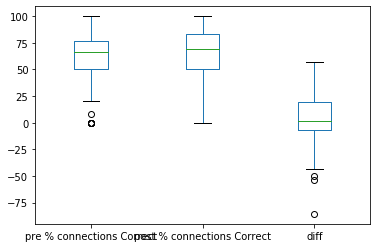

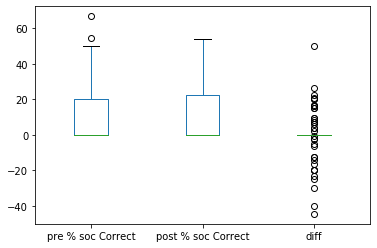

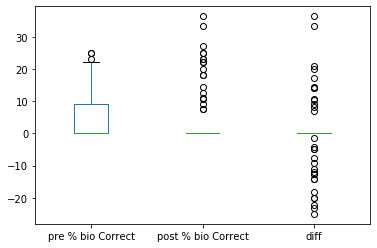

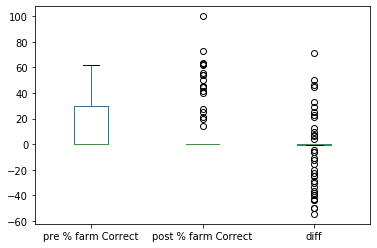

In [0]:
for fp in feature_pairs:
  extracted_cm_features_df['diff'] = extracted_cm_features_df[fp[1]] - extracted_cm_features_df[fp[0]]
  extracted_cm_features_df[fp+['diff']].plot(kind='box')

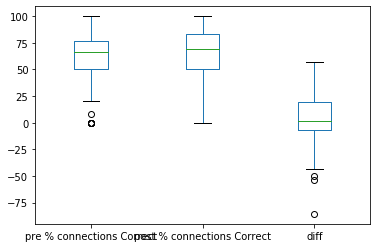

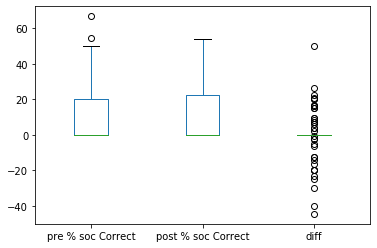

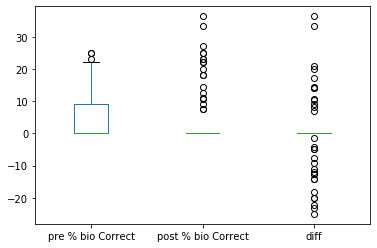

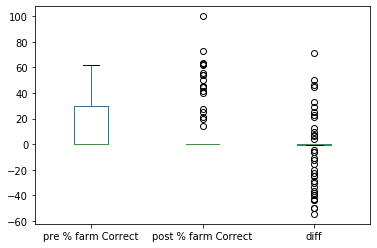

In [0]:
from numpy import log, sqrt
for fp in feature_pairs:
  df2['diff'] = df2[fp[1]] - df2[fp[0]]
  df2[fp+['diff']].plot(kind='box')

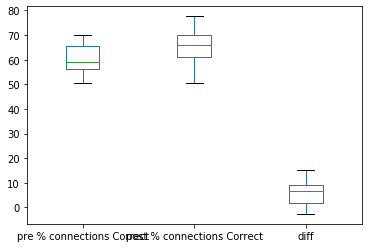

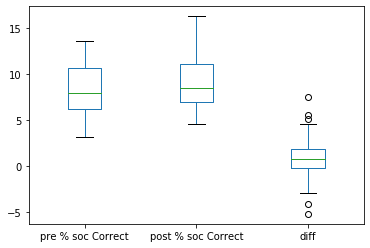

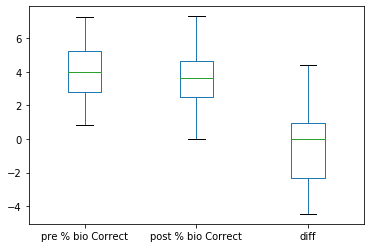

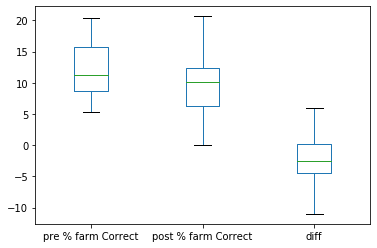

In [0]:
for fp in feature_pairs:
  sampled_df['diff'] = sampled_df[fp[1]] - sampled_df[fp[0]]
  sampled_df[fp+['diff']].plot(kind='box')

#### Assumption Check: Normal

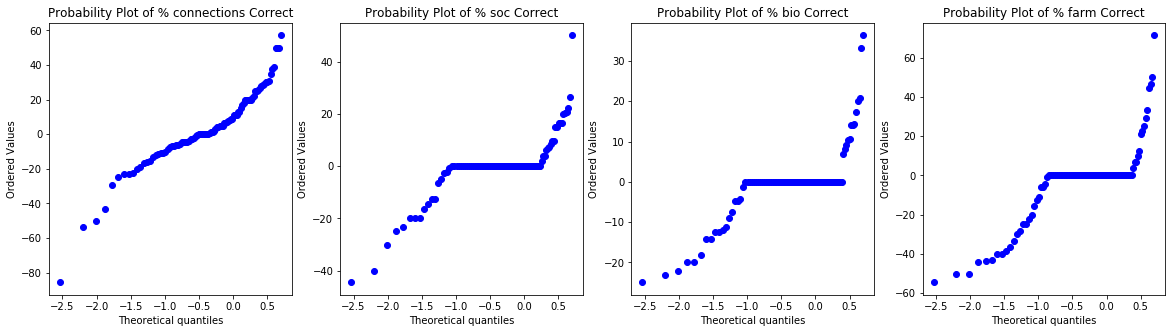

In [0]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,len(feature_pairs), figsize=(20,5))
for i in range(len(feature_pairs)):
  pre, post = feature_pairs[i]
  ax = axes[i]
  stats.probplot(list(df[post] - df[pre]), plot= ax)
  ax.set_title(f'Probability Plot of {pre[4:]}')

In [0]:
sampled_df[post] - sampled_df[pre]

1      -4.13704
2      -8.74443
3       2.67455
4      -4.12454
5      -5.06242
6       -2.4471
7      -2.57576
8      0.316887
9      -4.38147
10      -2.0814
11     -3.52092
12     -4.39394
13     -1.84007
14     -6.42196
15      6.03363
16     -5.84188
17     -2.24548
18     -11.0153
19     -1.00401
20      1.30231
21     -6.51615
22     -1.13617
23      1.26355
24      3.10185
25     -4.72971
26   -0.0508196
27     0.521035
28      -4.1835
29      2.80938
30     -3.28849
dtype: object

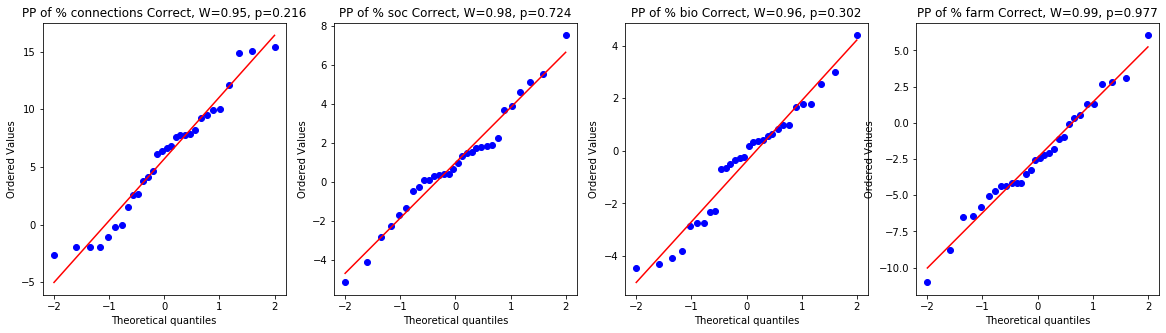

In [0]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,len(feature_pairs), figsize=(20,5))
for i in range(len(feature_pairs)):
  pre, post = feature_pairs[i]
  ax = axes[i]
  stats.probplot(list(sampled_df[post] - sampled_df[pre]), plot= ax)
  W,p = stats.shapiro(sampled_df[post]-sampled_df[pre])
  ax.set_title(f'PP of {pre[4:]}, W={round(W,2)}, p={round(p,3)}')

#### T-Test on paired samples

In [0]:
for pre, post in feature_pairs:
  print('TTest for', pre[4:],stats.ttest_rel(sampled_df[post], sampled_df[pre]))

TTest for % connections Correct Ttest_relResult(statistic=5.953228147593159, pvalue=1.8110075285769632e-06)
TTest for % soc Correct Ttest_relResult(statistic=1.9239640676835117, pvalue=0.06422350917772589)
TTest for % bio Correct Ttest_relResult(statistic=-0.9666791858971423, pvalue=0.3416974772324096)
TTest for % farm Correct Ttest_relResult(statistic=-3.5348162012968563, pvalue=0.0013909523491986377)


#### Wilcoxon signed-rank test on paired points

In [0]:
for pre, post in feature_pairs:
  print('TTest for', pre[4:],stats.wilcoxon(extracted_cm_features_df[post], extracted_cm_features_df[pre]))

TTest for % connections Correct WilcoxonResult(statistic=1427.5, pvalue=0.05643710501889215)
TTest for % soc Correct WilcoxonResult(statistic=336.5, pvalue=0.8209424933812693)
TTest for % bio Correct WilcoxonResult(statistic=225.5, pvalue=0.6591772978691082)
TTest for % farm Correct WilcoxonResult(statistic=264.5, pvalue=0.1241847829739293)


## Other (Not being used currently)

### Make new columns for clean to/from nodes

In [0]:
l = list(cm_df['from raw']) + list(cm_df['to raw'])

In [0]:
def find_closest_node(node_name, candidates,char_n=0):
    if len(candidates) == 0:
        return 'OTHER'
    if len(candidates) == 1 or char_n >= len(node_name):
        return candidates[0]
    if '/' in node_name or '&' in node_name:
        return 'OTHER'
    else:
        # squeeze candidates
        candidates = [c for c in candidates if c.upper().startswith(node_name[:char_n].upper())]
        # return
        return find_closest_node(node_name, candidates, char_n=char_n+1)

In [0]:
cleaning_nodes = {k:find_closest_node(k,GIVEN) for k in sorted([i for i in l if i not in GIVEN])}
#### manual section!
## LOOK THROUGH CLEANING_NODES AND REPLACE ANY BAD MATCHES WITH THE CORRECT ONES
cleaning_nodes['dirt'] = 'SOIL'
cleaning_nodes['coins'] = 'MONEY'
cleaning_nodes['depression'] = 'OTHER'
cleaning_nodes['air'] = 'OTHER'
cleaning_nodes['everything'] = 'OTHER'
cleaning_nodes['animals'] = 'OTHER'
cleaning_nodes['crop water'] = 'OTHER'
cleaning_nodes['fatilze water'] = 'OTHER'
cleaning_nodes['lumber/wood'] = 'OTHER'
cleaning_nodes['paper'] = 'OTHER'
cleaning_nodes['plants'] = 'OTHER'
cleaning_nodes['poop'] = 'MANURE'
cleaning_nodes['rain money'] = 'OTHER'
cleaning_nodes['wheat'] = 'FOOD'
cleaning_nodes['milk'] = 'FOOD'
cleaning_nodes['nutrients'] = 'OTHER'
#### manual section!
cleaning_nodes

{'Algae': 'ALGAE',
 'C.F': 'CROP FARMS',
 'Crop Farm': 'CROP FARMS',
 'Crop farms': 'CROP FARMS',
 'D.F': 'DAIRY FARMS',
 'Dairy Farm': 'DAIRY FARMS',
 'Dairy Farms': 'DAIRY FARMS',
 'Dairy farms': 'DAIRY FARMS',
 'Dairy farms ': 'DAIRY FARMS',
 'Food': 'FOOD',
 'Fruits + Veggies': 'FOOD',
 'Lakes': 'LAKES',
 'Manure': 'MANURE',
 'Money': 'MONEY',
 'None': 'NONE',
 'People': 'PEOPLE',
 'Rain': 'RAIN',
 'Soil': 'SOIL',
 'Water': 'WATER',
 'air': 'OTHER',
 'algae': 'ALGAE',
 'algai': 'ALGAE',
 'algea': 'ALGAE',
 'alger': 'ALGAE',
 'animals': 'OTHER',
 'coins': 'MONEY',
 'crop F': 'CROP FARMS',
 'crop farm': 'CROP FARMS',
 'crop farms': 'CROP FARMS',
 'crop water': 'OTHER',
 'crops': 'CROP FARMS',
 'crops farm': 'CROP FARMS',
 'crops farms': 'CROP FARMS',
 'dair farms': 'DAIRY FARMS',
 'dairy': 'DAIRY FARMS',
 'dairy F': 'DAIRY FARMS',
 'dairy crops': 'DAIRY FARMS',
 'dairy farm': 'DAIRY FARMS',
 'dairy farms': 'DAIRY FARMS',
 'dairy farms ': 'DAIRY FARMS',
 'darry farm': 'DAIRY FARMS',
 

In [0]:
def show_cm_cols():
  print(*[f'{i}. {c}' for i,c in enumerate(cm_df.columns)], sep='\n')
show_cm_cols()

0. Coder
1. User ID
2. Pre/Post
3. from raw
4. to raw
5. from clean
6. Description
7. to clean
8. Direction (0 none,1= -->,2 = <-->)
9. Coder Notes
10. Scorer
11. Unscorable
12. Is a relationship (not a definition, identity). 0 when blank
13. Relationship Description Correct
14. Relevant to System: Algae bloom, population sustainability, need for fertilizer
15. Score (1 if all are 1)
16. Computer Social / Economic
17. Computer Biological / Ecological
18. Computer Farming
19. Scorer Notes
20. Categorizer
21. Social / Economic (mentions $, people, food for people)
22. Biological / Ecological (mentions alge, soil lakes)
23. Farming (famrs, crops, fertilizer/manure)


In [0]:
clean_nodes = lambda l: [n if n in GIVEN else cleaning_nodes[n] for n in l]
cm_df['from clean'] = clean_nodes(cm_df['from raw'])
cm_df['to clean'] = clean_nodes(cm_df['to raw'])
has_regex = lambda regex: (cm_df['to clean'].str.contains(regex) | cm_df['from clean'].str.contains(regex)).astype('int')
cm_df.iloc[:,15] = has_regex('MONEY|PEOPLE')
cm_df.iloc[:,16] = has_regex('ALGAE|LAKES|RAIN')
cm_df.iloc[:,17] = has_regex('CROP FARMS|DAIRY FARMS|MANURE')
cm_df

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
0,John,A008,post,people,crop farms,PEOPLE,NaN,CROP FARMS,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
1,John,A008,post,crop farms,manure,CROP FARMS,NaN,MANURE,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,0.0,1.0
2,John,A008,post,crop farms,money,CROP FARMS,NaN,MONEY,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
3,John,A008,post,crop farms,soil,CROP FARMS,NaN,SOIL,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,1.0,1.0
4,John,A008,post,soil,water,SOIL,NaN,WATER,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,0,NaN,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Jenn,A107,Post,food,soil,FOOD,is grown in,SOIL,1,NaN,Jenn,NaN,1.0,1.0,1.0,0,0,0,0,NaN,COMPUTER,0.0,0.0,0.0
2468,Jenn,A107,Post,money,food,MONEY,food costs money,FOOD,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,0,0,0,NaN,COMPUTER,1.0,0.0,0.0
2469,Jenn,A107,Post,rain,soil,RAIN,waters the soil,SOIL,1,NaN,Jenn,NaN,1.0,1.0,0.0,0,1,0,0,NaN,COMPUTER,0.0,1.0,0.0
2470,Jenn,A107,Post,rain,lakes,RAIN,is found in,LAKES,1,NaN,Jenn,NaN,1.0,1.0,1.0,0,1,0,0,NaN,COMPUTER,0.0,1.0,0.0


#### If needed, export reformatted sheet here.

In [0]:
# cm_df.to_csv('reformatted coding sheet.tsv',sep='\t')

In [0]:
cm_df.head()

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
0,John,A008,post,people,crop farms,PEOPLE,NaN,CROP FARMS,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
1,John,A008,post,crop farms,manure,CROP FARMS,NaN,MANURE,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,0.0,1.0
2,John,A008,post,crop farms,money,CROP FARMS,NaN,MONEY,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
3,John,A008,post,crop farms,soil,CROP FARMS,NaN,SOIL,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,1.0,1.0
4,John,A008,post,soil,water,SOIL,NaN,WATER,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,0,NaN,NaN,0.0,1.0,NaN


### Explore Concept Map for Pertinent Relationships

In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','rain','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','rain','algae')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','algae','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','water','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','lakes','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
